# 项目：亚马逊销售数据

## 简介

该数据集包含超过一千条亚马逊产品的评分、评论、价格等信息，数据来自于亚马逊官方网站上列出的详细信息。

变量含义：
- `product_id`：产品id
- `product_name`：产品的名称
- `category`：产品的分类
- `discounted_price`：产品的折扣价格
- `actual_price`：产品的实际价格
- `discount_percentage`：产品折扣的百分比
- `rating`：消费者的评分
- `rating_count`：参与评分的消费者数量
- `about_product`：产品的描述
- `user_id`：为产品撰写评论的消费者id
- `user_name`：为产品撰写评论的消费者名称
- `review_id`：评论的id
- `review_title`：简短的评论题目
- `review_content`：评论内容
- `img_link`：产品的图片链接
- `product_link`：产品的官网链接

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./amazon.csv")

## **评估和清理数据**

In [3]:
cleaned_data = original_data.copy()

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
cleaned_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


`user_id`、`user_name`、`review_id` 列包含多个用户或评论 ID，用逗号分隔。这种情况可能需要拆分成单独的记录以便分析。

In [6]:
# 1. 将含有逗号的列拆分为列表
cleaned_data['user_id'] = cleaned_data['user_id'].str.split(',')
cleaned_data['user_name'] = cleaned_data['user_name'].str.split(',')
cleaned_data['review_id'] = cleaned_data['review_id'].str.split(',')

# 2. 使用 explode 函数，将每个列表中的元素展开为多行
cleaned_data = cleaned_data.explode('user_id').explode('user_name').explode('review_id')

# 重置索引，丢弃原来的索引，生成新的序号
cleaned_data = cleaned_data.reset_index(drop=True)

In [7]:
# cleaned_data.head()

`discounted_price` 和 `actual_price` 是以货币符号（₹）表示的字符串，而非数值类型，这需要转换为浮点数，去掉货币符号才能进行计算和分析。

`discount_percentage` 是字符串类型，包含 % 符号，需要去除 % 并转换为数值类型以便分析。

In [8]:
# 去掉货币符号 '₹' 和逗号，将价格列转换为浮点数
cleaned_data['discounted_price'] = cleaned_data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
cleaned_data['actual_price'] = cleaned_data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# 去掉百分比符号，将折扣列转换为浮点数
cleaned_data['discount_percentage'] = cleaned_data['discount_percentage'].str.replace('%', '').astype(float)

`rating` 和 `rating_count` 列也是字符串类型，需要转换为数值类型（浮点数和整数）。

使用中位数填充`rating_count`中的缺失值。

In [9]:
# 将评分列转换为数值类型，非数字值将被转为 NaN
cleaned_data['rating'] = pd.to_numeric(cleaned_data['rating'], errors='coerce')
# 删除 rating 列中包含 NaN 的行
cleaned_data = cleaned_data.dropna(subset=['rating'])

# 去掉评分数量中的逗号，并将其转换为数值
cleaned_data['rating_count'] = cleaned_data['rating_count'].str.replace(',', '').astype(float)
# 使用评分数量的中位数填充缺失值
cleaned_data['rating_count'].fillna(cleaned_data['rating_count'].median(), inplace=True)

In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727985 entries, 0 to 728496
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   product_id           727985 non-null  object 
 1   product_name         727985 non-null  object 
 2   category             727985 non-null  object 
 3   discounted_price     727985 non-null  float64
 4   actual_price         727985 non-null  float64
 5   discount_percentage  727985 non-null  float64
 6   rating               727985 non-null  float64
 7   rating_count         727985 non-null  float64
 8   about_product        727985 non-null  object 
 9   user_id              727985 non-null  object 
 10  user_name            727985 non-null  object 
 11  review_id            727985 non-null  object 
 12  review_title         727985 non-null  object 
 13  review_content       727985 non-null  object 
 14  img_link             727985 non-null  object 
 15  product_link         7

## **数据分析**

In [11]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

### 1 产品价格分析

In [12]:
# # 折扣幅度
# cleaned_data['discount_diff'] = cleaned_data['actual_price'] - cleaned_data['discounted_price']

# # 按类别比较折扣幅度
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='category', y='discount_diff', data=cleaned_data)
# plt.xticks(rotation=90)
# plt.title('Discount range by category')
# plt.show()

# # 种类太多了

In [13]:
# 最高折扣产品
max_discount = cleaned_data.loc[cleaned_data['discount_percentage'].idxmax()]
print("最高折扣产品:\n", max_discount)

# 最低折扣产品
min_discount = cleaned_data.loc[cleaned_data['discount_percentage'].idxmin()]
print("最低折扣产品:\n", min_discount)

最高折扣产品:
 product_id                                                    B097C564GC
product_name           rts [2 Pack] Mini USB C Type C Adapter Plug, T...
category               Computers&Accessories|Accessories&Peripherals|...
discounted_price                                                   294.0
actual_price                                                      4999.0
discount_percentage                                                 94.0
rating                                                               4.3
rating_count                                                      4426.0
about_product          【WIDER COMPATIBILITY】This USB C Female to USB ...
user_id                                     AGO5SRT3ESLNL5WTRQFD5BSIYPQA
user_name                                             Naga Sai Gadagottu
review_id                                                 R3CUNCZTU43JPP
review_title           Tiny helping hand,Good product,As a whole good...
review_content         This eliminates the

### 2 评分分析

In [14]:
# 评分最高产品
highest_rated = cleaned_data.loc[cleaned_data['rating'].idxmax()]
print("评分最高产品:\n", highest_rated)

# 评分最低产品
lowest_rated = cleaned_data.loc[cleaned_data['rating'].idxmin()]
print("评分最低产品:\n", lowest_rated)

评分最高产品:
 product_id                                                    B0BP7XLX48
product_name           Syncwire LTG to USB Cable for Fast Charging Co...
category               Computers&Accessories|Accessories&Peripherals|...
discounted_price                                                   399.0
actual_price                                                      1999.0
discount_percentage                                                 80.0
rating                                                               5.0
rating_count                                                         5.0
about_product          This sturdy and durable cable made of tpe and ...
user_id                                     AF7EOXYL5K36BDP6PXF6K2TL5TPA
user_name                                                Amazon Customer
review_id                                                 R1L2JNO4Y3BHYF
review_title           Good,Superb quality,Good products  nice one,Wo...
review_content         Product is good in 

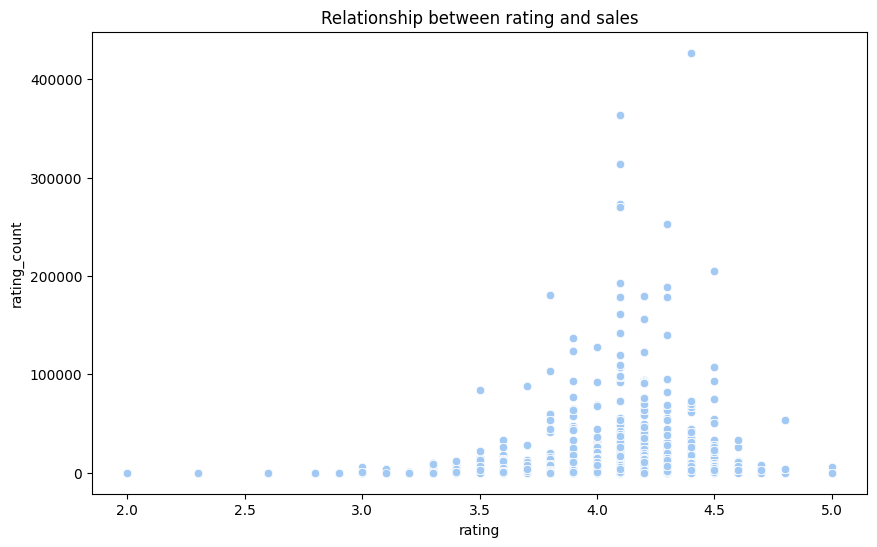

In [15]:
# 评估评分与销量（评论数量）的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='rating_count', data=cleaned_data)
plt.title('Relationship between rating and sales')
plt.show()

### 3 类别分析

不同产品类别的销量、折扣情况和平均评分

In [16]:
# 计算每个类别的平均评分、销量和折扣
category_analysis = cleaned_data.groupby('category').agg({
    'rating': 'mean',
    'rating_count': 'sum',
    'discount_percentage': 'mean'
}).reset_index()

print(category_analysis)

                                              category    rating  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000   
1    Computers&Accessories|Accessories&Peripherals|...  4.150000   
2    Computers&Accessories|Accessories&Peripherals|...  3.500000   
3    Computers&Accessories|Accessories&Peripherals|...  3.600000   
4    Computers&Accessories|Accessories&Peripherals|...  4.050000   
..                                                 ...       ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000   

     rating_count  discount_percentage  
0        572416.0                 42.0  
1       3054592.0                 78.5  
2       3697664.0                 35.0  
3       9099776.0  

In [17]:
# # 可视化
# plt.figure(figsize=(10, 6))
# sns.barplot(x='category', y='rating', data=category_analysis)
# plt.xticks(rotation=90)
# plt.title('Average rating across different product categories')
# plt.show()

# # 但是种类太多了

### 4 评论活跃度分析

In [18]:
# 统计每个用户的评论数量
user_activity = cleaned_data['user_id'].value_counts().reset_index()
user_activity.columns = ['user_id', 'comment_count']

# 打印最活跃的前10个用户
print(user_activity.head(10))

                        user_id  comment_count
0  AG5DWPD54QGSLWJ6QUFERLPNAX4Q            704
1  AE55KTFVNXYFD5FPYWP2OUPEYNPQ            704
2  AECPFYFQVRUWC3KGNLJIOREFP5LQ            640
3  AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA            640
4  AHMGAC6QM62UXNEOCZIHLHSXPP2Q            640
5  AFHROSCGIXUPV3FYQ7H5QOD46Q7Q            640
6  AEAMIR3CMSA32IDEINSJKHRNANTA            640
7  AF355FTXYAKFH5NYPRTE7SL3WO3Q            640
8  AEBWA5I4QFCA3P3OBEPMELBGN4GQ            640
9  AFV7ZA733ZLME4KNLZPMPCBUNPPA            624


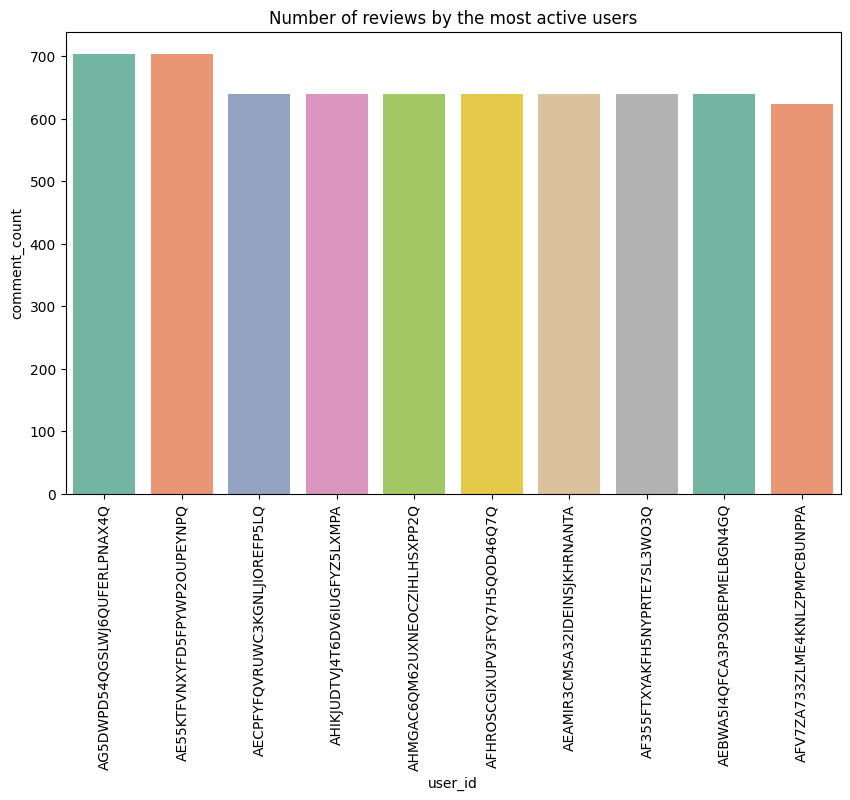

In [20]:
# 可视化最活跃用户的评论数量
plt.figure(figsize=(10, 6))
sns.barplot(x='user_id', y='comment_count', hue='user_id', data=user_activity.head(10), palette='Set2', legend=False)
plt.title('Number of reviews by the most active users')
plt.xticks(rotation=90)
plt.show()